# Close cross Ema - Strategy - Backtesting 

### Import Library

In [12]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting.backtesting import Backtest, Strategy

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')
from backtesting import set_bokeh_output
set_bokeh_output(notebook=False)

### Load Price Data

In [13]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [14]:
data = dataset.copy()

In [15]:
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2020-11-01 00:00:00']

In [16]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627


In [17]:
def get_signal(r):
    signal = ''
    if r['Open'] < r['ema_low'] < r['Close']:
        signal = 'long'
    elif r['Open'] > r['ema_low'] > r['Close']:
        signal = 'short'
    return signal

In [18]:
def prepare_data(data):
    data['max_in_range'] = data['High'].rolling(10).max()
    data['min_in_range'] = data['Low'].rolling(10).min()
    data["ema_low"] = ta.ema(data["Close"], length=250)
    data['signal'] = data.apply(lambda r: get_signal(r), axis=1)
    return data

In [19]:
prepared_data = prepare_data(data)
prepared_data.dropna(inplace=True)

In [20]:
prepared_data

,Open,High,Low,Close,Volume,max_in_range,min_in_range,ema_low,signal
Date,,,,,,,,,
2020-11-06 14:10:00,908.0,911.9,907.5,911.0,5068,911.9,903.3,908.782400,long
2020-11-06 14:15:00,911.0,912.7,910.5,910.6,5948,912.7,903.5,908.796883,
2020-11-06 14:20:00,910.7,911.2,909.4,910.9,4466,912.7,903.5,908.813641,
2020-11-06 14:25:00,910.5,911.0,908.5,910.0,3602,912.7,904.4,908.823094,
2020-11-06 14:30:00,910.5,910.7,910.5,910.7,78,912.7,906.2,908.838049,
...,...,...,...,...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524,1300.9,1295.6,1287.412327,
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161,1300.9,1295.9,1287.489520,
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627,1300.9,1295.9,1287.576456,


In [21]:
prepared_data[prepared_data.signal != ''].tail(20)

,Open,High,Low,Close,Volume,max_in_range,min_in_range,ema_low,signal
Date,,,,,,,,,
2024-10-15 13:50:00,1362.0,1362.0,1358.7,1359.2,6508,1364.8,1358.7,1361.720515,short
2024-10-17 14:10:00,1354.7,1359.6,1354.6,1359.6,11098,1359.6,1349.0,1357.674451,long
2024-10-30 09:40:00,1341.2,1341.6,1339.9,1339.9,3376,1342.7,1339.4,1340.630770,short
2024-10-31 09:05:00,1338.9,1339.7,1338.9,1339.7,1286,1342.0,1331.5,1339.404440,long
2024-10-31 09:15:00,1340.0,1340.0,1338.6,1338.9,2928,1342.0,1331.5,1339.405128,short
2024-10-31 13:05:00,1338.4,1340.3,1338.2,1339.7,6778,1340.3,1335.1,1338.882787,long
2024-10-31 13:10:00,1339.8,1340.4,1338.7,1338.7,3894,1340.4,1336.0,1338.881330,short
2024-10-31 13:25:00,1338.7,1339.8,1338.6,1339.6,2563,1340.4,1336.8,1338.884202,long
2024-11-01 09:00:00,1340.4,1340.4,1337.5,1337.8,10641,1347.8,1337.5,1339.369588,short


In [22]:
class MainStrategy(Strategy):
    max_sl = 3.1
    trailing_sl = 4.5
    tp_step = 25
    def init(self):
        super().init()

    def next(self):
        super().next()
        close_price = self.data.Close[-1]
        if self.position.is_long:
            max_in_range = self.data.max_in_range[-1]
            if close_price < max_in_range - self.trailing_sl:
                self.position.close()
        elif self.position.is_short:
            min_in_range = self.data.min_in_range[-1]
            if close_price > min_in_range + self.trailing_sl:
                self.position.close()
 
        if self.position:
            return  
        signal = self.data.signal[-1]
        if signal == 'long':
            buy_price = close_price
            sl = buy_price - self.max_sl
            tp = buy_price + self.tp_step
            self.buy(size=1, sl=sl, tp=tp)
        elif signal == 'short':
            sell_price = close_price
            sl = sell_price + self.max_sl
            tp = sell_price - self.tp_step
            self.sell(size=1, sl=sl, tp=tp)

In [23]:
bt = Backtest(prepared_data, MainStrategy, commission=.0003, exclusive_orders=True)
stats = bt.run()

In [24]:
stats

Start                     2020-11-06 14:10:00
End                       2024-11-26 09:05:00
Duration                   1480 days 18:55:00
Exposure Time [%]                   14.991948
Equity Final [$]                  10467.21576
Equity Peak [$]                   10471.91576
Return [%]                           4.672158
Buy & Hold Return [%]               42.502744
Return (Ann.) [%]                    1.142416
Volatility (Ann.) [%]                0.894237
Sharpe Ratio                         1.277531
Sortino Ratio                        2.205541
Calmar Ratio                         1.534193
Max. Drawdown [%]                   -0.744637
Avg. Drawdown [%]                   -0.069661
Max. Drawdown Duration      284 days 20:30:00
Avg. Drawdown Duration        9 days 21:09:00
# Trades                                  660
Win Rate [%]                        33.636364
Best Trade [%]                        2.98267
Worst Trade [%]                     -2.508328
Avg. Trade [%]                    

In [25]:
stats['_trades'].tail(20)

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
640,1,48879,48886,1302.69069,1299.1,-3.59069,-0.002756,2024-09-12 13:50:00,2024-09-12 14:25:00,None,0 days 00:35:00
641,1,49551,49552,1355.50653,1354.2,-1.30653,-0.000964,2024-10-02 09:05:00,2024-10-02 09:10:00,None,0 days 00:05:00
642,1,49554,49555,1356.00668,1354.5,-1.50668,-0.001111,2024-10-02 09:20:00,2024-10-02 09:25:00,None,0 days 00:05:00
643,-1,49587,49594,1354.09365,1357.9,-3.80635,-0.002811,2024-10-02 13:30:00,2024-10-02 14:05:00,None,0 days 00:35:00
644,-1,49640,49643,1356.79284,1360.3,-3.50716,-0.002585,2024-10-03 13:40:00,2024-10-03 13:55:00,None,0 days 00:15:00
645,-1,49647,49649,1356.39296,1357.6,-1.20704,-0.000890,2024-10-03 14:15:00,2024-10-03 14:25:00,None,0 days 00:10:00
646,1,49797,49798,1349.20464,1345.7,-3.50464,-0.002598,2024-10-08 14:00:00,2024-10-08 14:05:00,None,0 days 00:05:00
647,1,49816,49824,1348.60446,1345.3,-3.30446,-0.002450,2024-10-09 09:55:00,2024-10-09 10:35:00,None,0 days 00:40:00
648,1,49829,49851,1348.30437,1353.0,4.69563,0.003483,2024-10-09 11:00:00,2024-10-09 14:15:00,None,0 days 03:15:00
649,-1,50005,50011,1360.49173,1363.1,-2.60827,-0.001917,2024-10-14 14:20:00,2024-10-15 09:10:00,None,0 days 18:50:00


In [26]:
stats['_trades']['PnL'].min()

-32.08360999999991

In [27]:
trades = stats['_trades']

In [28]:
trades[trades.PnL < -4]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
8,-1,1476,1483,1016.69490,1025.6,-8.90510,-0.008759,2020-12-17 14:05:00,2020-12-18 09:00:00,None,0 days 18:55:00
47,-1,5689,5689,1288.71327,1293.1,-4.38673,-0.003404,2021-04-22 13:15:00,2021-04-22 13:15:00,None,0 days 00:00:00
65,-1,6461,6462,1364.89041,1369.0,-4.10959,-0.003011,2021-05-17 13:50:00,2021-05-17 13:55:00,None,0 days 00:05:00
71,-1,6519,6521,1368.48933,1375.0,-6.51067,-0.004758,2021-05-18 14:25:00,2021-05-18 14:45:00,None,0 days 00:20:00
72,-1,6877,6879,1429.57100,1434.2,-4.62900,-0.003238,2021-05-27 14:30:00,2021-05-28 09:00:00,None,0 days 18:30:00
88,-1,7741,7746,1476.75684,1485.4,-8.64316,-0.005853,2021-06-21 14:15:00,2021-06-22 09:00:00,None,0 days 18:45:00
146,-1,10394,10396,1427.07175,1434.0,-6.92825,-0.004855,2021-09-01 14:30:00,2021-09-06 09:00:00,None,4 days 18:30:00
193,1,13214,13216,1518.45540,1514.4,-4.05540,-0.002671,2021-11-22 10:10:00,2021-11-22 10:20:00,None,0 days 00:10:00
221,1,14214,14220,1519.85582,1512.0,-7.85582,-0.005169,2021-12-17 14:10:00,2021-12-20 09:00:00,None,2 days 18:50:00
246,1,15900,15914,1542.96275,1538.0,-4.96275,-0.003216,2022-02-10 14:45:00,2022-02-11 10:05:00,None,0 days 19:20:00


In [29]:
trades[trades.PnL < -4]['PnL'].sum()

-243.03704999999832

In [30]:
len(trades[trades.PnL < -4])

32

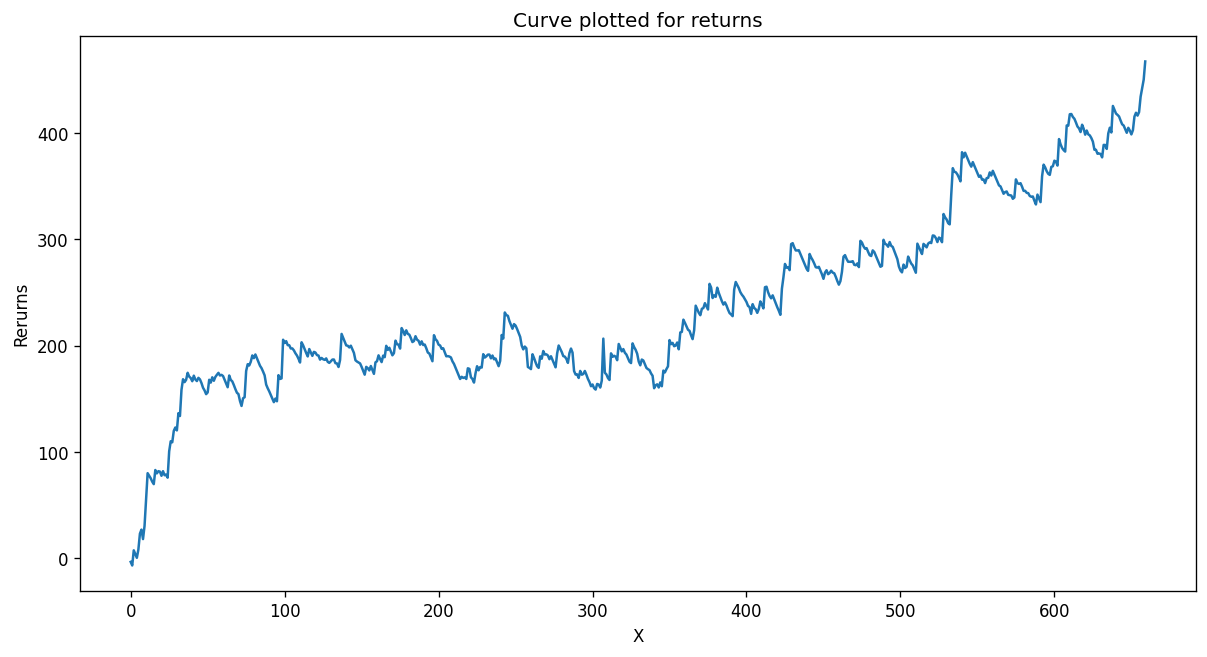

In [31]:
copy_trades = trades.copy()
copy_trades['cum_sum'] = copy_trades['PnL'].cumsum()
X = np.array(range(0, len(copy_trades['cum_sum'])))
Y = copy_trades['cum_sum']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for returns")
plt.xlabel("X")
plt.ylabel("Rerurns")
plt.show()

## Optimize

In [32]:
max_sl_params = [x / 10.0 for x in range(20, 50, 2)]
trailing_sl_params = [x / 10.0 for x in range(30, 100, 5)]
tp_step_params = [x for x in range(10, 30)]

In [33]:
trailing_sl_params

[3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

In [34]:
optimize_stats, optimize_table = bt.optimize(
                                      trailing_sl=trailing_sl_params,
                                      tp_step=tp_step_params,
                    maximize='Return [%]', 
                    random_state=0,
                    return_heatmap=True)

In [35]:
optimize_stats

Start                     2020-11-06 14:10:00
End                       2024-11-26 09:05:00
Duration                   1480 days 18:55:00
Exposure Time [%]                   25.271143
Equity Final [$]                   10723.3102
Equity Peak [$]                    10731.6102
Return [%]                           7.233102
Buy & Hold Return [%]               42.502744
Return (Ann.) [%]                    1.752431
Volatility (Ann.) [%]                 1.11914
Sharpe Ratio                         1.565873
Sortino Ratio                        2.746634
Calmar Ratio                         1.442442
Max. Drawdown [%]                   -1.214905
Avg. Drawdown [%]                   -0.062385
Max. Drawdown Duration      606 days 18:45:00
Avg. Drawdown Duration        6 days 02:36:00
# Trades                                  549
Win Rate [%]                        25.865209
Best Trade [%]                        2.98267
Worst Trade [%]                     -2.508328
Avg. Trade [%]                    

In [36]:
optimize_table

trailing_sl  tp_step
3.0          10        -0.433468
             11        -0.162468
             12        -0.129468
             13         0.014532
             14         0.435532
                          ...   
9.5          25         5.941351
             26         5.632351
             27         6.223351
             28         6.655351
             29         6.982601
Name: Return [%], Length: 280, dtype: float64

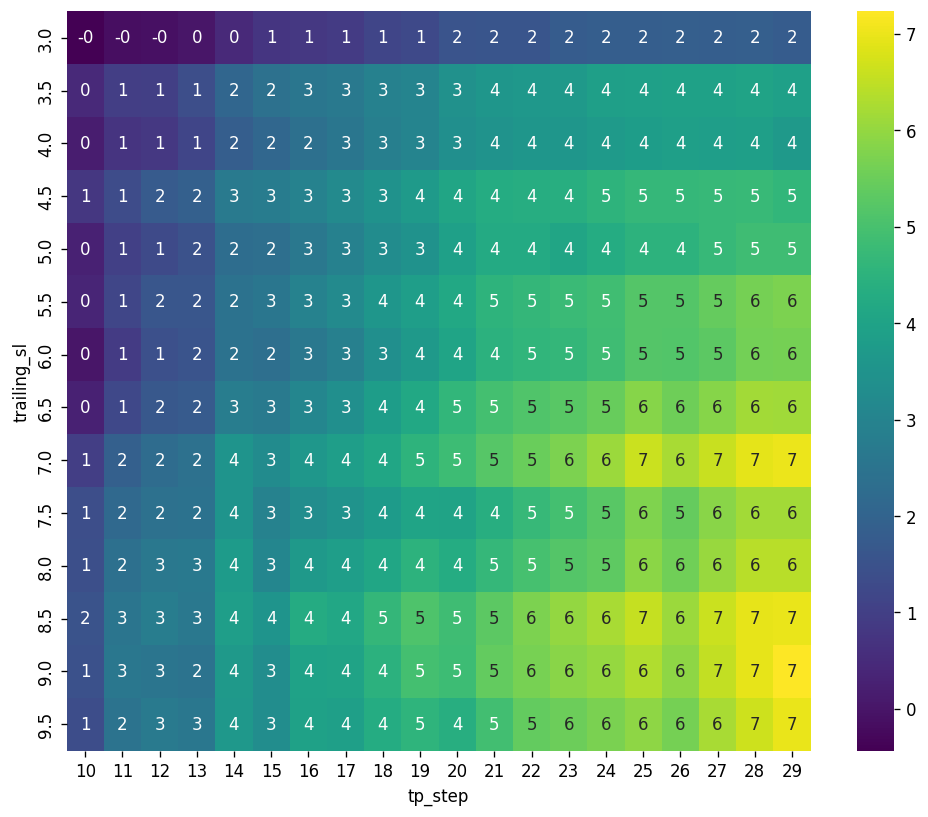

In [37]:
import seaborn as sns
# Convert multiindex series to dataframe
heatmap_df = optimize_table.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()